# Linear Regression

Linear model to predict the miles per gallon(MPG) of a car

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing DataSet

In [2]:
#loading the data to pandas object
path='./original_dataset.csv'
df=pd.read_csv(path,header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
#creating list of column name provided to us in project_description.names
columns_name=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']

In [4]:
#allocating the name to to columns of df
df.columns=columns_name

In [5]:
df.shape

(406, 9)

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


# Data wrangling

In [7]:
#finding total number of nan values
df.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [10]:
#droping the rows with nan value of mpg as this is the attribute we want to predict
#and we van not assume the values of dependent variable
df.dropna(subset=['mpg'],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

Text(0.5, 1.0, 'Skwedness of Horsepower')

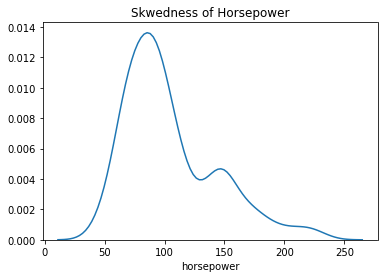

In [11]:
#distplot to find the skwedness of horsepower
sns.distplot(df['horsepower'],hist=False)
plt.title("Skwedness of Horsepower")

In [12]:
print("Mean of horsepower is",(df['horsepower'].mean(skipna=True)))
print("Median of horsepower is",(df['horsepower'].median(skipna=True)))

Mean of horsepower is 104.46938775510205
Median of horsepower is 93.5


In [13]:
#replacing the nan values of horsepower with its median
df['horsepower'].replace(np.nan,df['horsepower'].median(skipna=True),inplace=True)

In [14]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# Data Analysis using Data Visualization 

In [15]:
df['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [16]:
df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

Text(0.5, 1.0, 'cylinder vs mpg')

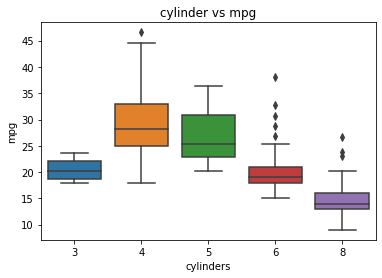

In [17]:
sns.boxplot(x='cylinders',y='mpg',data=df)
plt.title("cylinder vs mpg")

This plot shows that Number of Cylinders has a good relation with MPG as the plot is distributed

Text(0.5, 1.0, 'displacement vs mpg')

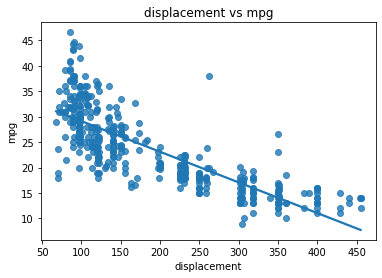

In [18]:
sns.regplot(x='displacement',y='mpg',data=df,ci=None)
plt.title("displacement vs mpg")

this graph shows that mpg is inversely proportional to displacement as the displacement incerases the mpg decreases 

Text(0.5, 1.0, 'horsepower vs mpg')

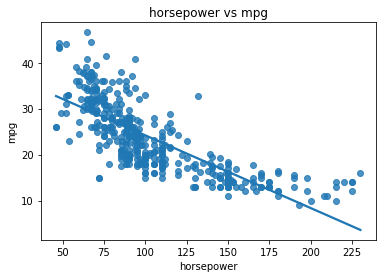

In [19]:
sns.regplot(x='horsepower',y='mpg',data=df,ci=None)
plt.title("horsepower vs mpg")

this graph also shows that mpg is inversely proportional to horsepower as the horsepower incerases the mpg decreases 

Text(0.5, 1.0, 'weight vs mpg')

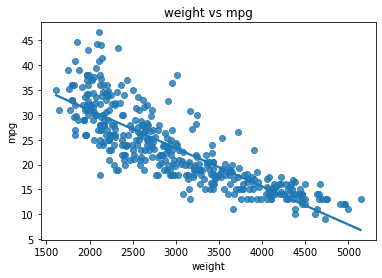

In [20]:
sns.regplot(x='weight',y='mpg',data=df,ci=None)
plt.title("weight vs mpg")

this graph also has a inverse relation as weight increases the mpg decreases

Text(0.5, 1.0, 'acceleration vs mpg')

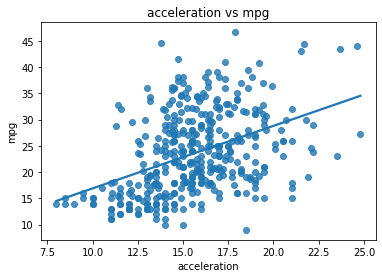

In [21]:
sns.regplot(x='acceleration',y='mpg',data=df,ci=None)
plt.title("acceleration vs mpg")

this graph shows that acceleration doesn't form a good relationship with mpg as the points are scttered in large amount and the RMS value will we very high

In [22]:
#acceleration doesn't seems to be a good predictor of mpg as data is randomly destributed
df[['acceleration','mpg']].corr()

,acceleration,mpg
acceleration,1.000000,0.420289
mpg,0.420289,1.000000


In [23]:
print(df['model year'].nunique())
print(df[['model year','mpg']].corr())

13
            model year       mpg
model year    1.000000  0.579267
mpg           0.579267  1.000000


Text(0.5, 1.0, 'model year vs mpg')

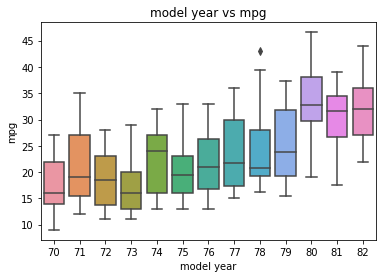

In [24]:
sns.boxplot(x='model year',y='mpg',data=df)
plt.title("model year vs mpg")

this graph shows that model year also has a pretty good relationship with mpg as the plots are bit distributed

In [25]:
print(df['origin'].nunique())
print(df[['origin','mpg']].corr())

3
         origin      mpg
origin  1.00000  0.56345
mpg     0.56345  1.00000


Text(0.5, 1.0, 'origin vs mpg')

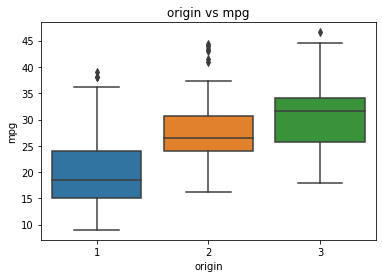

In [26]:
sns.boxplot(x='origin',y='mpg',data=df)
plt.title("origin vs mpg")

this graph shows that origin also has a pretty good relationship to predict mpg of a car

In [27]:
df['car name'].nunique()

305

In [28]:
#droping the column car name as it doesn't contribute in model prediction
df.drop('car name',axis=1,inplace=True)

In [29]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [30]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


# Model Development

# Simple Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [32]:
x_slr=df[["weight"]]
y_slr=df["mpg"]

In [33]:
x_train_slr,x_test_slr,y_train_slr,y_test_slr=train_test_split(x_slr,y_slr,test_size=0.3,random_state=1)

In [34]:
lm_slr=LinearRegression()

In [35]:
lm_slr.fit(x_train_slr,y_train_slr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
yhat_train_slr=lm_slr.predict(x_train_slr)

In [37]:
yhat_test_slr=lm_slr.predict(x_test_slr)

Text(0.5, 0, 'Price')

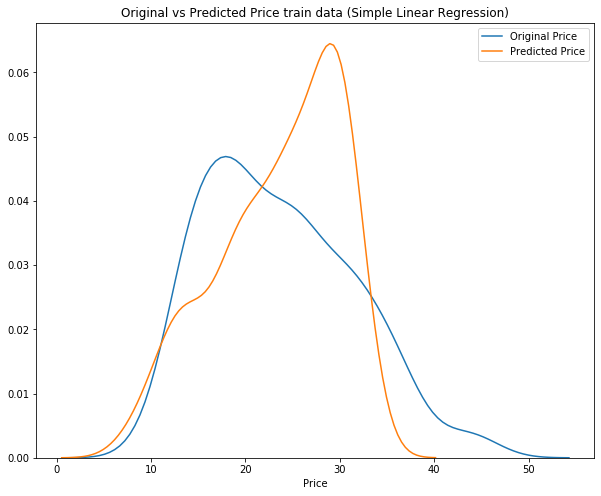

In [38]:
plt.figure(figsize=(10,8))
sns.distplot(y_train_slr,hist=False,label="Original Price")
sns.distplot(yhat_train_slr,hist=False,label="Predicted Price")
plt.title("Original vs Predicted Price train data (Simple Linear Regression)")
plt.xlabel("Price")

Text(0.5, 0, 'Price')

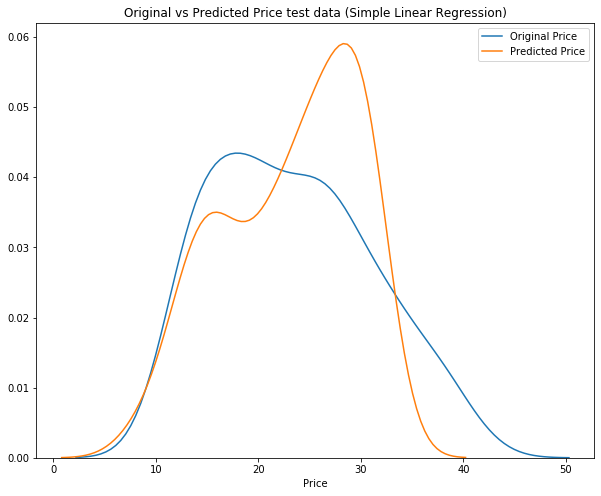

In [39]:
plt.figure(figsize=(10,8))
sns.distplot(y_test_slr,hist=False,label="Original Price")
sns.distplot(yhat_test_slr,hist=False,label="Predicted Price")
plt.title("Original vs Predicted Price test data (Simple Linear Regression)")
plt.xlabel("Price")

Cross Validation Score

In [40]:
cross_score_slr=cross_val_score(lm_slr,x_test_slr,y_test_slr)
cross_score_slr.mean()

0.7268739412336604

Mean Squared Error

In [41]:
mean_error_slr=mean_squared_error(yhat_test_slr,y_test_slr)
mean_error_slr

15.597077922801555

R2 value

In [42]:
r2_slr=lm_slr.score(x_test_slr,y_test_slr)
r2_slr

0.7332325331513996

# Multiple Linear Regression

In [43]:
from sklearn.feature_selection import RFE

In [44]:
lm_mlr=LinearRegression()

In [45]:
x_mlr=df.drop('mpg',axis=1)
y_mlr=df['mpg']

In [81]:
rfe=RFE(lm_mlr,7)
rfe=rfe.fit(x_mlr,y_mlr)
z=x_mlr.columns[rfe.support_]
z

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [82]:
x_train_mlr,x_test_mlr,y_train_mlr,y_test_mlr=train_test_split(x_mlr[z],y_mlr,test_size=0.3,random_state=0)

In [83]:
lm_mlr.fit(x_train_mlr,y_train_mlr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
yhat_train_mlr=lm_mlr.predict(x_train_mlr)

In [85]:
yhat_test_mlr=lm_mlr.predict(x_test_mlr)

Text(0.5, 0, 'Price')

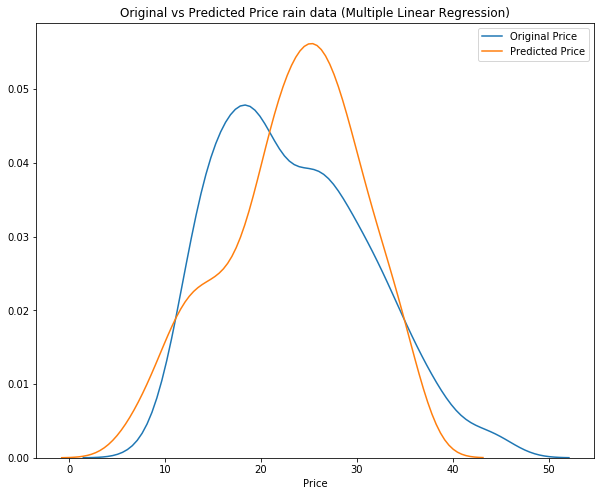

In [86]:
plt.figure(figsize=(10,8))
sns.distplot(y_train_mlr,hist=False,label="Original Price")
sns.distplot(yhat_train_mlr,hist=False,label="Predicted Price")
plt.title("Original vs Predicted Price rain data (Multiple Linear Regression)")
plt.xlabel("Price")

Text(0.5, 0, 'Price')

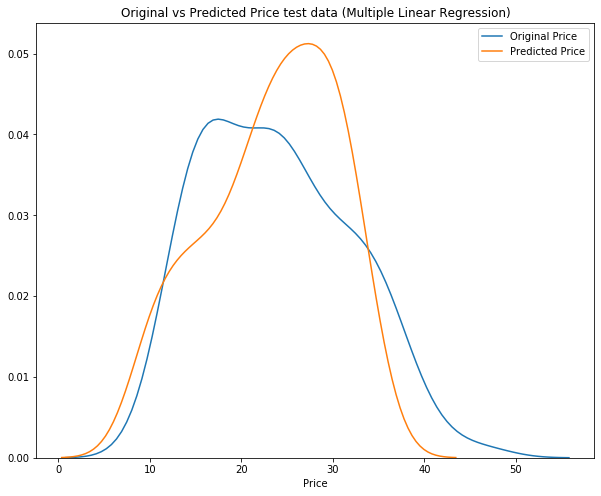

In [87]:
plt.figure(figsize=(10,8))
sns.distplot(y_test_mlr,hist=False,label="Original Price")
sns.distplot(yhat_test_mlr,hist=False,label="Predicted Price")
plt.title("Original vs Predicted Price test data (Multiple Linear Regression)")
plt.xlabel("Price")

Cross Validaion Score

In [88]:
cross_val_mlr=cross_val_score(lm_mlr,x_test_mlr,y_test_mlr)
cross_val_mlr.mean()

0.7952596810133803

Mean Squared Error

In [89]:
mean_error_mlr=mean_squared_error(yhat_test_mlr,y_test_mlr)
mean_error_mlr

11.689963364262722

R2 score

In [90]:
r2_mlr=lm_mlr.score(x_test_mlr,y_test_mlr)
r2_mlr

0.8170638660159202

# Polynomial Regression

In [92]:
x=df['displacement']
y=df['mpg']
f=np.polyfit(x,y,2)
p=np.poly1d(f)
p

poly1d([ 1.71523386e-04, -1.39442501e-01,  4.22089081e+01])

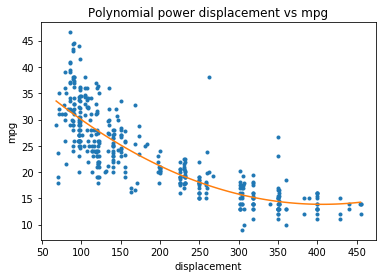

In [93]:
x_new=np.linspace(df['displacement'].min(),df['displacement'].max(),100)
#polynomial values of degree 2 of the new values
y_new=p(x_new)
plt.plot(x,y,'.',x_new,y_new,'-')
plt.title("Polynomial power displacement vs mpg")
plt.xlabel("displacement")
plt.ylabel("mpg")
plt.show()

this graph shows that polynomial line fit more accuratly in the data as mpg and displacement have inverse relationship

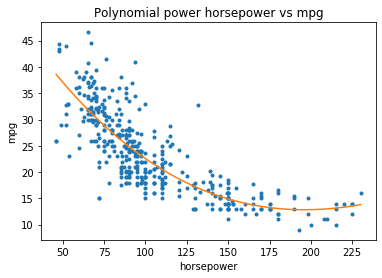

In [94]:
x=df['horsepower']
y=df['mpg']
f=np.polyfit(x,y,3)
p=np.poly1d(f)
x_new=np.linspace(df['horsepower'].max(),df['horsepower'].min(),100)
y_new=p(x_new)
plt.plot(x,y,'.',x_new,y_new,'-')
plt.title("Polynomial power horsepower vs mpg")
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.show()

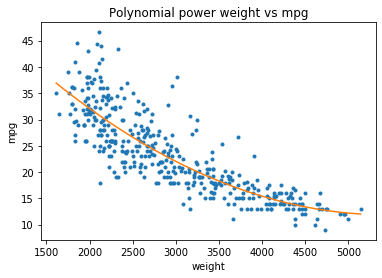

In [95]:
x=df['weight']
y=df['mpg']
f=np.polyfit(x,y,3)
p=np.poly1d(f)
x_new=np.linspace(df['weight'].max(),df['weight'].min(),100)
y_new=p(x_new)
plt.plot(x,y,'.',x_new,y_new,'-')
plt.title("Polynomial power weight vs mpg")
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()

above observation shows that polynomial values fit much better then the linear values hence polynomial regression can give more accuracy then linear model

In [102]:
from sklearn.preprocessing import PolynomialFeatures

In [117]:
pr=PolynomialFeatures(degree=2)

In [118]:
z_pr=pr.fit_transform(x_mlr[z])

In [119]:
z_pr=pd.DataFrame(z_pr)

In [120]:
x_train_poly,x_test_poly,y_train_poly,y_test_poly=train_test_split(z_pr,df['mpg'],test_size=0.3,random_state=1)

In [121]:
lm_poly=LinearRegression()

In [122]:
lm_poly.fit(x_train_poly,y_train_poly)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
yhat_train_poly=lm_poly.predict(x_train_poly)

In [124]:
yhat_test_poly=lm_poly.predict(x_test_poly)

Text(0.5, 0, 'Price')

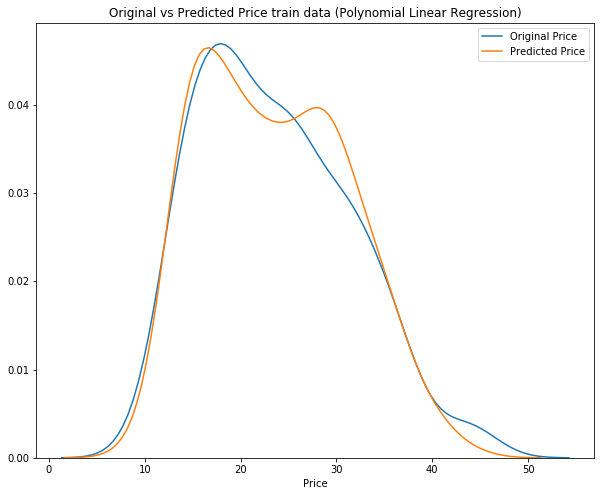

In [125]:
plt.figure(figsize=(10,8))
sns.distplot(y_train_poly,hist=False,label="Original Price")
sns.distplot(yhat_train_poly,hist=False,label="Predicted Price")
plt.title("Original vs Predicted Price train data (Polynomial Linear Regression)")
plt.xlabel("Price")

Text(0.5, 0, 'Price')

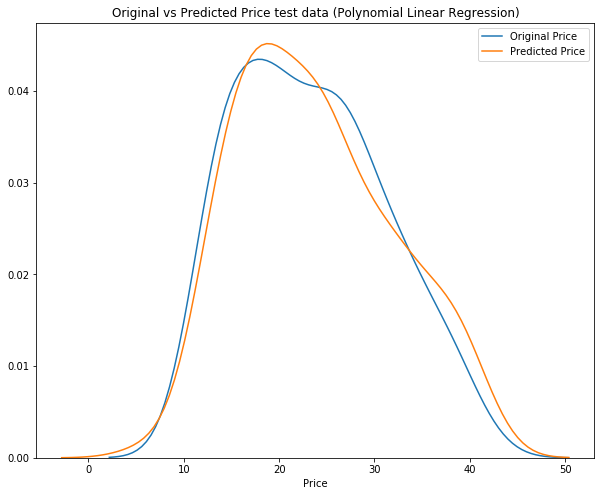

In [126]:
plt.figure(figsize=(10,8))
sns.distplot(y_test_poly,hist=False,label="Original Price")
sns.distplot(yhat_test_poly,hist=False,label="Predicted Price")
plt.title("Original vs Predicted Price test data (Polynomial Linear Regression)")
plt.xlabel("Price")

Cross Validation Score

In [127]:
cross_val_poly=cross_val_score(lm_poly,x_test_poly,y_test_poly)
cross_val_poly.mean()

0.7947286634935967

Mean Squared Error

In [128]:
mean_error_poly=mean_squared_error(yhat_test_poly,y_test_poly)
mean_error_poly

9.355445178772353

R2 Score

In [129]:
r2_poly=lm_poly.score(x_test_poly,y_test_poly)
r2_poly

0.8399874371382401

We can conclude that polynomial regression model fits the data in most perfect manner as compaired to simple ,multiple linear regression model as we can see from mean Squared error and R2 value of all three models